<a href="https://colab.research.google.com/github/istiaqahmedfahim/cloud_workload_forecasting/blob/main/Final_comparison(Lsru%2BGru%2BBilstm-cnn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import tensorflow as tf
rcParams['figure.figsize'] = 20, 16

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [6]:
df = pd.read_csv("/content/43.csv")
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333


In [7]:
Sum_disk=(df["Disk read throughput [KB/s]"] + df["Disk write throughput [KB/s]"])
df["Disk I/O"]=Sum_disk
df["Disk I/O"]=((df["Disk I/O"]-df["Disk I/O"].min())/(df["Disk I/O"].max()-df["Disk I/O"].min()))*20
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Disk I/O
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000,0.022571
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000,0.002508
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000,0.000167
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000,0.000167
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000,0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000,1.409906
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667,0.007356
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667,0.002675
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333,2.721338


In [8]:
df1=df.iloc[4,:]

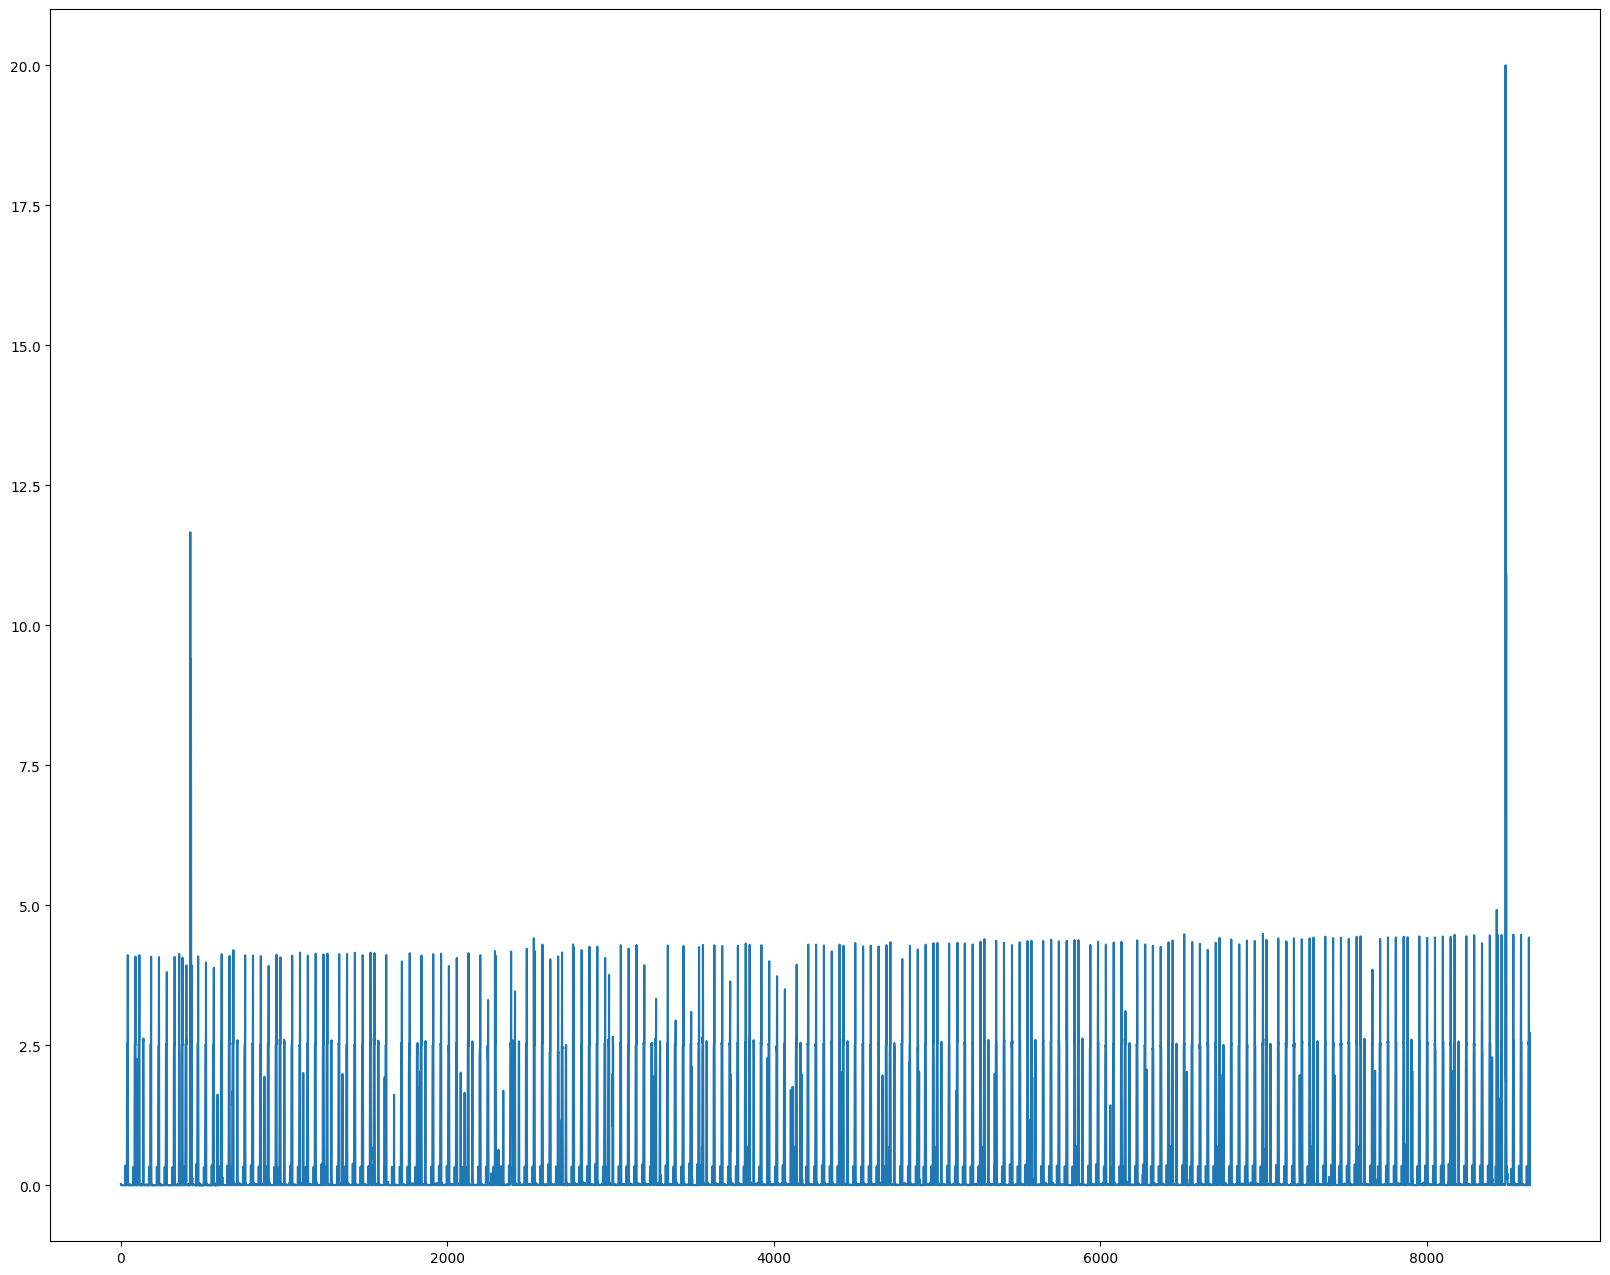

In [9]:
df1 = df['Disk I/O']
df1=df1.to_frame()
plt.plot(df1)
dataset = df1.values
dataset = dataset.astype('float32') #COnvert values to float

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [11]:
desired_value = 0.0

# Find all indices where the desired value occurs in the specified column
indices_of_value = df[df['Disk I/O'] == desired_value].index

if not indices_of_value.empty:
    print(f"The value '{desired_value}' was found in the column '' at indices: {indices_of_value.tolist()}")
else:
    print(f"The value '{desired_value}' was not found in the column ''")
print(len(indices_of_value.tolist()))


The value '0.0' was found in the column '' at indices: [5, 9, 10, 11, 13, 17, 23, 24, 27, 33, 34, 46, 47, 53, 55, 61, 63, 65, 67, 69, 70, 73, 79, 81, 82, 93, 94, 95, 97, 98, 103, 115, 116, 118, 119, 120, 127, 128, 131, 132, 142, 143, 144, 145, 146, 149, 151, 157, 158, 160, 163, 164, 166, 167, 168, 169, 170, 178, 188, 191, 192, 193, 197, 199, 202, 203, 204, 205, 206, 211, 212, 213, 215, 216, 217, 218, 223, 224, 226, 227, 236, 239, 243, 245, 250, 252, 255, 256, 260, 263, 264, 265, 266, 271, 273, 284, 285, 286, 287, 288, 291, 293, 300, 302, 303, 305, 308, 309, 311, 312, 313, 315, 319, 320, 322, 332, 334, 336, 337, 338, 339, 340, 343, 350, 360, 361, 362, 370, 380, 382, 384, 386, 391, 404, 405, 406, 408, 415, 417, 422, 440, 463, 467, 475, 479, 486, 491, 493, 495, 498, 499, 504, 505, 524, 529, 530, 533, 534, 539, 541, 542, 547, 551, 553, 554, 555, 559, 578, 579, 581, 583, 586, 587, 589, 590]
175


In [12]:
# Drop rows with null values based on indices
df.drop(indices_of_value, inplace=True)

# Alternatively, you can create a new DataFrame without modifying the original one:
# new_df = df.drop(null_indices)

# If you want to reset the index after dropping rows:
df.reset_index(drop=True, inplace=True)

# Verify that null values have been dropped
print("DataFrame after dropping rows with null values:")
print(df)

DataFrame after dropping rows with null values:
      Timestamp [ms]  CPU cores  CPU capacity provisioned [MHZ]  \
0         1376314846          2                     5851.998636   
1         1376315146          2                     5851.998636   
2         1376315446          2                     5851.998636   
3         1376315746          2                     5851.998636   
4         1376316046          2                     5851.998636   
...              ...        ...                             ...   
8452      1378905598          2                     5851.998944   
8453      1378905898          2                     5851.998944   
8454      1378906198          2                     5851.998944   
8455      1378906498          2                     5851.998944   
8456      1378906798          2                     5851.998944   

      CPU usage [MHZ]  CPU usage [%]  Memory capacity provisioned [KB]  \
0            3.901332       0.066667                         2097152.0   

In [13]:
desired_value = 0.0

# Find all indices where the desired value occurs in the specified column
indices_of_value = df[df['Disk I/O'] == desired_value].index

if not indices_of_value.empty:
    print(f"The value '{desired_value}' was found in the column '' at indices: {indices_of_value.tolist()}")
else:
    print(f"The value '{desired_value}' was not found in the column ''")
print(len(indices_of_value.tolist()))

The value '0.0' was not found in the column ''
0


In [14]:
def to_sequences(dataset, seq_size):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape
def create_model(seq_size):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                        strides=1, padding="causal",
                        activation="relu",
                        input_shape=[None, seq_size]),
    tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
    tf.keras.layers.GRU(64,activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [19]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = int(len(dataset) * 0.10)
        validation_size = int(len(dataset) - train_size - test_size)
        # Split the dataset into training, testing, and validation sets
        train = dataset[:train_size]
        test = dataset[train_size:train_size + test_size]
        validation = dataset[train_size + test_size:]

        trainX, trainY = to_sequences(train, seq_size)
        valX, valY = to_sequences(validation, seq_size)
        testX , testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(valX, valY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00121, saving model to best_model.h5
88/88 - 4s - loss: 0.0016 - mae: 0.0237 - mse: 0.0016 - val_loss: 0.0012 - val_mae: 0.0136 - val_mse: 0.0012 - 4s/epoch - 48ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00121 to 0.00108, saving model to best_model.h5
88/88 - 1s - loss: 7.3539e-04 - mae: 0.0125 - mse: 7.3539e-04 - val_loss: 0.0011 - val_mae: 0.0172 - val_mse: 0.0011 - 589ms/epoch - 7ms/step
Epoch 3/300

Epoch 3: val_mse did not improve from 0.00108
88/88 - 0s - loss: 6.8593e-04 - mae: 0.0119 - mse: 6.8593e-04 - val_loss: 0.0014 - val_mae: 0.0121 - val_mse: 0.0014 - 442ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00108 to 0.00100, saving model to best_model.h5
88/88 - 1s - loss: 6.3259e-04 - mae: 0.0112 - mse: 6.3259e-04 - val_loss: 9.9570e-04 - val_mae: 0.0136 - val_mse: 9.9570e-04 - 508ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mse did not improve from 0.00100
88/88 - 1s - loss: 5.7062e-04 - mae: 0.0110 - mse: 5.7062e-04 - val_loss: 0.0011 - val_mae: 0.0104 - val_mse: 0.0011 - 542ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00100
88/88 - 1s - loss: 5.5069e-04 - mae: 0.0105 - mse: 5.5069e-04 - val_los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00120 to 0.00112, saving model to best_model.h5
87/87 - 1s - loss: 6.6649e-04 - mae: 0.0116 - mse: 6.6649e-04 - val_loss: 0.0011 - val_mae: 0.0116 - val_mse: 0.0011 - 603ms/epoch - 7ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00112 to 0.00110, saving model to best_model.h5
87/87 - 1s - loss: 5.5169e-04 - mae: 0.0098 - mse: 5.5169e-04 - val_loss: 0.0011 - val_mae: 0.0098 - val_mse: 0.0011 - 571ms/epoch - 7ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00110 to 0.00106, saving model to best_model.h5
87/87 - 0s - loss: 5.0984e-04 - mae: 0.0093 - mse: 5.0984e-04 - val_loss: 0.0011 - val_mae: 0.0099 - val_mse: 0.0011 - 489ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mse did not improve from 0.00106
87/87 - 0s - loss: 5.1368e-04 - mae: 0.0092 - mse: 5.1368e-04 - val_loss: 0.0011 - val_mae: 0.0103 - val_mse: 0.0011 - 452ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00106 to 0.00099, saving model to best_model.h5
87/87 - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00122 to 0.00109, saving model to best_model.h5
87/87 - 1s - loss: 6.2993e-04 - mae: 0.0112 - mse: 6.2993e-04 - val_loss: 0.0011 - val_mae: 0.0114 - val_mse: 0.0011 - 627ms/epoch - 7ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00109 to 0.00102, saving model to best_model.h5
87/87 - 1s - loss: 5.5232e-04 - mae: 0.0102 - mse: 5.5232e-04 - val_loss: 0.0010 - val_mae: 0.0117 - val_mse: 0.0010 - 552ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mse did not improve from 0.00102
87/87 - 1s - loss: 4.4700e-04 - mae: 0.0087 - mse: 4.4700e-04 - val_loss: 0.0011 - val_mae: 0.0095 - val_mse: 0.0011 - 589ms/epoch - 7ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00102 to 0.00097, saving model to best_model.h5
87/87 - 1s - loss: 4.3670e-04 - mae: 0.0087 - mse: 4.3670e-04 - val_loss: 9.6756e-04 - val_mae: 0.0098 - val_mse: 9.6756e-04 - 548ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00097
87/87 - 1s - loss: 4.0212e-04 - mae:

In [21]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.7],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = int(len(dataset) * 0.10)
        validation_size = int(len(dataset) - train_size - test_size)
        # Split the dataset into training, testing, and validation sets
        train = dataset[:train_size]
        test = dataset[train_size:train_size + test_size]
        validation = dataset[train_size + test_size:]

        trainX, trainY = to_sequences(train, seq_size)
        valX, valY = to_sequences(validation, seq_size)
        testX , testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(valX, valY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00136, saving model to best_model.h5
94/94 - 4s - loss: 0.0016 - mae: 0.0236 - mse: 0.0016 - val_loss: 0.0014 - val_mae: 0.0155 - val_mse: 0.0014 - 4s/epoch - 43ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00136 to 0.00129, saving model to best_model.h5
94/94 - 1s - loss: 7.1183e-04 - mae: 0.0120 - mse: 7.1183e-04 - val_loss: 0.0013 - val_mae: 0.0130 - val_mse: 0.0013 - 530ms/epoch - 6ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00129 to 0.00119, saving model to best_model.h5
94/94 - 1s - loss: 6.5745e-04 - mae: 0.0115 - mse: 6.5745e-04 - val_loss: 0.0012 - val_mae: 0.0146 - val_mse: 0.0012 - 520ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mse did not improve from 0.00119
94/94 - 0s - loss: 6.2961e-04 - mae: 0.0115 - mse: 6.2961e-04 - val_loss: 0.0013 - val_mae: 0.0111 - val_mse: 0.0013 - 481ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00119 to 0.00109, saving model to best_model.h5
94/94 - 1s - loss: 5.7669e-04 - mae: 0.0105 - mse: 5.7669e-04 - val_loss: 0.0011 - val_mae: 0.0136 - val_mse: 0.0011 - 514ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00109 to 0.00105, saving model to best_model.h5
94/94 - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00136 to 0.00128, saving model to best_model.h5
94/94 - 1s - loss: 6.1368e-04 - mae: 0.0106 - mse: 6.1368e-04 - val_loss: 0.0013 - val_mae: 0.0111 - val_mse: 0.0013 - 528ms/epoch - 6ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00128 to 0.00119, saving model to best_model.h5
94/94 - 1s - loss: 5.4916e-04 - mae: 0.0098 - mse: 5.4916e-04 - val_loss: 0.0012 - val_mae: 0.0126 - val_mse: 0.0012 - 554ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mse did not improve from 0.00119
94/94 - 0s - loss: 5.0220e-04 - mae: 0.0095 - mse: 5.0220e-04 - val_loss: 0.0012 - val_mae: 0.0104 - val_mse: 0.0012 - 496ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00119 to 0.00113, saving model to best_model.h5
94/94 - 1s - loss: 4.8837e-04 - mae: 0.0089 - mse: 4.8837e-04 - val_loss: 0.0011 - val_mae: 0.0110 - val_mse: 0.0011 - 575ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00113 to 0.00105, saving model to best_model.h5
94/94 - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse did not improve from 0.00135
93/93 - 1s - loss: 5.7061e-04 - mae: 0.0101 - mse: 5.7061e-04 - val_loss: 0.0014 - val_mae: 0.0109 - val_mse: 0.0014 - 526ms/epoch - 6ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00135 to 0.00115, saving model to best_model.h5
93/93 - 1s - loss: 4.9094e-04 - mae: 0.0091 - mse: 4.9094e-04 - val_loss: 0.0012 - val_mae: 0.0118 - val_mse: 0.0012 - 564ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00115 to 0.00115, saving model to best_model.h5
93/93 - 1s - loss: 4.3675e-04 - mae: 0.0084 - mse: 4.3675e-04 - val_loss: 0.0012 - val_mae: 0.0104 - val_mse: 0.0012 - 547ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00115 to 0.00113, saving model to best_model.h5
93/93 - 1s - loss: 4.1038e-04 - mae: 0.0084 - mse: 4.1038e-04 - val_loss: 0.0011 - val_mae: 0.0110 - val_mse: 0.0011 - 790ms/epoch - 8ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00113 to 0.00108, saving model to best_model.h5
93/93 - 1

In [22]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.75],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = int(len(dataset) * 0.10)
        validation_size = int(len(dataset) - train_size - test_size)
        # Split the dataset into training, testing, and validation sets
        train = dataset[:train_size]
        test = dataset[train_size:train_size + test_size]
        validation = dataset[train_size + test_size:]

        trainX, trainY = to_sequences(train, seq_size)
        valX, valY = to_sequences(validation, seq_size)
        testX , testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(valX, valY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00178, saving model to best_model.h5
101/101 - 4s - loss: 0.0020 - mae: 0.0288 - mse: 0.0020 - val_loss: 0.0018 - val_mae: 0.0160 - val_mse: 0.0018 - 4s/epoch - 43ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00178 to 0.00157, saving model to best_model.h5
101/101 - 1s - loss: 7.6159e-04 - mae: 0.0130 - mse: 7.6159e-04 - val_loss: 0.0016 - val_mae: 0.0127 - val_mse: 0.0016 - 827ms/epoch - 8ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00157 to 0.00145, saving model to best_model.h5
101/101 - 1s - loss: 6.7146e-04 - mae: 0.0119 - mse: 6.7146e-04 - val_loss: 0.0015 - val_mae: 0.0119 - val_mse: 0.0015 - 681ms/epoch - 7ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00145 to 0.00140, saving model to best_model.h5
101/101 - 1s - loss: 6.3097e-04 - mae: 0.0114 - mse: 6.3097e-04 - val_loss: 0.0014 - val_mae: 0.0117 - val_mse: 0.0014 - 544ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00140 to 0.00130, saving model to best_model.h5
101/101 - 1s - loss: 5.9791e-04 - mae: 0.0110 - mse: 5.9791e-04 - val_loss: 0.0013 - val_mae: 0.0122 - val_mse: 0.0013 - 507ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00130 to 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00158 to 0.00151, saving model to best_model.h5
101/101 - 1s - loss: 6.1883e-04 - mae: 0.0112 - mse: 6.1883e-04 - val_loss: 0.0015 - val_mae: 0.0116 - val_mse: 0.0015 - 546ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00151 to 0.00142, saving model to best_model.h5
101/101 - 1s - loss: 5.2615e-04 - mae: 0.0098 - mse: 5.2615e-04 - val_loss: 0.0014 - val_mae: 0.0128 - val_mse: 0.0014 - 560ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00142 to 0.00139, saving model to best_model.h5
101/101 - 1s - loss: 4.9925e-04 - mae: 0.0098 - mse: 4.9925e-04 - val_loss: 0.0014 - val_mae: 0.0102 - val_mse: 0.0014 - 518ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00139 to 0.00130, saving model to best_model.h5
101/101 - 1s - loss: 4.6053e-04 - mae: 0.0092 - mse: 4.6053e-04 - val_loss: 0.0013 - val_mae: 0.0122 - val_mse: 0.0013 - 516ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00130 to 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00164 to 0.00152, saving model to best_model.h5
100/100 - 1s - loss: 5.7525e-04 - mae: 0.0106 - mse: 5.7525e-04 - val_loss: 0.0015 - val_mae: 0.0117 - val_mse: 0.0015 - 806ms/epoch - 8ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00152 to 0.00141, saving model to best_model.h5
100/100 - 1s - loss: 4.9589e-04 - mae: 0.0096 - mse: 4.9589e-04 - val_loss: 0.0014 - val_mae: 0.0108 - val_mse: 0.0014 - 556ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00141 to 0.00138, saving model to best_model.h5
100/100 - 1s - loss: 4.4685e-04 - mae: 0.0089 - mse: 4.4685e-04 - val_loss: 0.0014 - val_mae: 0.0129 - val_mse: 0.0014 - 574ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00138 to 0.00133, saving model to best_model.h5
100/100 - 1s - loss: 3.9809e-04 - mae: 0.0084 - mse: 3.9809e-04 - val_loss: 0.0013 - val_mae: 0.0097 - val_mse: 0.0013 - 586ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00133 to 0.001

GRU model define and evaluation

In [23]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape
def create_model(seq_size):
  model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(64,activation="relu", input_shape=[None, seq_size]),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [24]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65,0.75],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = int(len(dataset) * 0.10)
        validation_size = int(len(dataset) - train_size - test_size)
        # Split the dataset into training, testing, and validation sets
        train = dataset[:train_size]
        test = dataset[train_size:train_size + test_size]
        validation = dataset[train_size + test_size:]

        trainX, trainY = to_sequences(train, seq_size)
        valX, valY = to_sequences(validation, seq_size)
        testX , testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(valX, valY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00151, saving model to best_model.h5
88/88 - 2s - loss: 0.0014 - mae: 0.0237 - mse: 0.0014 - val_loss: 0.0015 - val_mae: 0.0202 - val_mse: 0.0015 - 2s/epoch - 24ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00151 to 0.00133, saving model to best_model.h5
88/88 - 0s - loss: 9.0134e-04 - mae: 0.0175 - mse: 9.0134e-04 - val_loss: 0.0013 - val_mae: 0.0175 - val_mse: 0.0013 - 336ms/epoch - 4ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00133 to 0.00124, saving model to best_model.h5
88/88 - 0s - loss: 7.8438e-04 - mae: 0.0162 - mse: 7.8438e-04 - val_loss: 0.0012 - val_mae: 0.0165 - val_mse: 0.0012 - 328ms/epoch - 4ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00124 to 0.00118, saving model to best_model.h5
88/88 - 0s - loss: 7.0539e-04 - mae: 0.0145 - mse: 7.0539e-04 - val_loss: 0.0012 - val_mae: 0.0157 - val_mse: 0.0012 - 324ms/epoch - 4ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00118 to 0.00114, saving model to best_model.h5
88/88 - 0s - loss: 6.6322e-04 - mae: 0.0138 - mse: 6.6322e-04 - val_loss: 0.0011 - val_mae: 0.0162 - val_mse: 0.0011 - 311ms/epoch - 4ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00114 to 0.00113, savi

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00122 to 0.00116, saving model to best_model.h5
87/87 - 0s - loss: 6.8864e-04 - mae: 0.0146 - mse: 6.8864e-04 - val_loss: 0.0012 - val_mae: 0.0157 - val_mse: 0.0012 - 307ms/epoch - 4ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00116 to 0.00108, saving model to best_model.h5
87/87 - 0s - loss: 5.8521e-04 - mae: 0.0132 - mse: 5.8521e-04 - val_loss: 0.0011 - val_mae: 0.0138 - val_mse: 0.0011 - 309ms/epoch - 4ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00108 to 0.00105, saving model to best_model.h5
87/87 - 0s - loss: 5.3068e-04 - mae: 0.0122 - mse: 5.3068e-04 - val_loss: 0.0011 - val_mae: 0.0138 - val_mse: 0.0011 - 308ms/epoch - 4ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00105 to 0.00103, saving model to best_model.h5
87/87 - 0s - loss: 5.0192e-04 - mae: 0.0119 - mse: 5.0192e-04 - val_loss: 0.0010 - val_mae: 0.0142 - val_mse: 0.0010 - 319ms/epoch - 4ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00103
87/87 - 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00122 to 0.00113, saving model to best_model.h5
87/87 - 0s - loss: 6.5506e-04 - mae: 0.0148 - mse: 6.5506e-04 - val_loss: 0.0011 - val_mae: 0.0154 - val_mse: 0.0011 - 310ms/epoch - 4ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00113 to 0.00108, saving model to best_model.h5
87/87 - 0s - loss: 5.5646e-04 - mae: 0.0133 - mse: 5.5646e-04 - val_loss: 0.0011 - val_mae: 0.0142 - val_mse: 0.0011 - 415ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00108 to 0.00105, saving model to best_model.h5
87/87 - 0s - loss: 5.0899e-04 - mae: 0.0124 - mse: 5.0899e-04 - val_loss: 0.0011 - val_mae: 0.0146 - val_mse: 0.0011 - 457ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse did not improve from 0.00105
87/87 - 1s - loss: 4.5744e-04 - mae: 0.0113 - mse: 4.5744e-04 - val_loss: 0.0011 - val_mae: 0.0144 - val_mse: 0.0011 - 509ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00105 to 0.00104, saving model to best_model.h5
87/87 - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00191 to 0.00170, saving model to best_model.h5
101/101 - 0s - loss: 8.2074e-04 - mae: 0.0164 - mse: 8.2074e-04 - val_loss: 0.0017 - val_mae: 0.0192 - val_mse: 0.0017 - 337ms/epoch - 3ms/step
Epoch 3/300

Epoch 3: val_mse did not improve from 0.00170
101/101 - 0s - loss: 7.1415e-04 - mae: 0.0147 - mse: 7.1415e-04 - val_loss: 0.0017 - val_mae: 0.0176 - val_mse: 0.0017 - 318ms/epoch - 3ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00170 to 0.00159, saving model to best_model.h5
101/101 - 0s - loss: 6.5783e-04 - mae: 0.0136 - mse: 6.5783e-04 - val_loss: 0.0016 - val_mae: 0.0170 - val_mse: 0.0016 - 312ms/epoch - 3ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00159 to 0.00154, saving model to best_model.h5
101/101 - 0s - loss: 6.2478e-04 - mae: 0.0132 - mse: 6.2478e-04 - val_loss: 0.0015 - val_mae: 0.0159 - val_mse: 0.0015 - 299ms/epoch - 3ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00154 to 0.00152, saving model to best_model.h5
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00166 to 0.00159, saving model to best_model.h5
101/101 - 0s - loss: 6.5828e-04 - mae: 0.0147 - mse: 6.5828e-04 - val_loss: 0.0016 - val_mae: 0.0167 - val_mse: 0.0016 - 358ms/epoch - 4ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00159 to 0.00151, saving model to best_model.h5
101/101 - 0s - loss: 5.7482e-04 - mae: 0.0134 - mse: 5.7482e-04 - val_loss: 0.0015 - val_mae: 0.0155 - val_mse: 0.0015 - 349ms/epoch - 3ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00151 to 0.00148, saving model to best_model.h5
101/101 - 0s - loss: 5.1727e-04 - mae: 0.0122 - mse: 5.1727e-04 - val_loss: 0.0015 - val_mae: 0.0156 - val_mse: 0.0015 - 331ms/epoch - 3ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00148 to 0.00144, saving model to best_model.h5
101/101 - 0s - loss: 4.8827e-04 - mae: 0.0117 - mse: 4.8827e-04 - val_loss: 0.0014 - val_mae: 0.0150 - val_mse: 0.0014 - 307ms/epoch - 3ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00144
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00173 to 0.00163, saving model to best_model.h5
100/100 - 0s - loss: 6.5929e-04 - mae: 0.0147 - mse: 6.5929e-04 - val_loss: 0.0016 - val_mae: 0.0164 - val_mse: 0.0016 - 328ms/epoch - 3ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00163 to 0.00152, saving model to best_model.h5
100/100 - 0s - loss: 5.6135e-04 - mae: 0.0132 - mse: 5.6135e-04 - val_loss: 0.0015 - val_mae: 0.0158 - val_mse: 0.0015 - 353ms/epoch - 4ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00152 to 0.00145, saving model to best_model.h5
100/100 - 0s - loss: 5.0212e-04 - mae: 0.0123 - mse: 5.0212e-04 - val_loss: 0.0015 - val_mae: 0.0152 - val_mse: 0.0015 - 326ms/epoch - 3ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00145 to 0.00144, saving model to best_model.h5
100/100 - 0s - loss: 4.7426e-04 - mae: 0.0118 - mse: 4.7426e-04 - val_loss: 0.0014 - val_mae: 0.0163 - val_mse: 0.0014 - 366ms/epoch - 4ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00144 to 0.001

In [25]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.70],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = int(len(dataset) * 0.10)
        validation_size = int(len(dataset) - train_size - test_size)
        # Split the dataset into training, testing, and validation sets
        train = dataset[:train_size]
        test = dataset[train_size:train_size + test_size]
        validation = dataset[train_size + test_size:]

        trainX, trainY = to_sequences(train, seq_size)
        valX, valY = to_sequences(validation, seq_size)
        testX , testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(valX, valY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00162, saving model to best_model.h5
94/94 - 2s - loss: 0.0014 - mae: 0.0236 - mse: 0.0014 - val_loss: 0.0016 - val_mae: 0.0197 - val_mse: 0.0016 - 2s/epoch - 22ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00162 to 0.00144, saving model to best_model.h5
94/94 - 0s - loss: 8.4421e-04 - mae: 0.0165 - mse: 8.4421e-04 - val_loss: 0.0014 - val_mae: 0.0184 - val_mse: 0.0014 - 290ms/epoch - 3ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00144 to 0.00137, saving model to best_model.h5
94/94 - 0s - loss: 7.2694e-04 - mae: 0.0148 - mse: 7.2694e-04 - val_loss: 0.0014 - val_mae: 0.0163 - val_mse: 0.0014 - 312ms/epoch - 3ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00137 to 0.00131, saving model to best_model.h5
94/94 - 0s - loss: 6.7504e-04 - mae: 0.0139 - mse: 6.7504e-04 - val_loss: 0.0013 - val_mae: 0.0157 - val_mse: 0.0013 - 290ms/epoch - 3ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00131 to 0.00127, saving model to best_model.h5
94/94 - 0s - loss: 6.3097e-04 - mae: 0.0131 - mse: 6.3097e-04 - val_loss: 0.0013 - val_mae: 0.0147 - val_mse: 0.0013 - 300ms/epoch - 3ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00127 to 0.00124, savi

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00136 to 0.00125, saving model to best_model.h5
94/94 - 0s - loss: 6.9174e-04 - mae: 0.0148 - mse: 6.9174e-04 - val_loss: 0.0012 - val_mae: 0.0157 - val_mse: 0.0012 - 306ms/epoch - 3ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00125 to 0.00123, saving model to best_model.h5
94/94 - 0s - loss: 5.9159e-04 - mae: 0.0134 - mse: 5.9159e-04 - val_loss: 0.0012 - val_mae: 0.0156 - val_mse: 0.0012 - 313ms/epoch - 3ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00123 to 0.00117, saving model to best_model.h5
94/94 - 0s - loss: 5.3828e-04 - mae: 0.0125 - mse: 5.3828e-04 - val_loss: 0.0012 - val_mae: 0.0147 - val_mse: 0.0012 - 310ms/epoch - 3ms/step
Epoch 5/300

Epoch 5: val_mse did not improve from 0.00117
94/94 - 0s - loss: 5.0006e-04 - mae: 0.0120 - mse: 5.0006e-04 - val_loss: 0.0012 - val_mae: 0.0150 - val_mse: 0.0012 - 300ms/epoch - 3ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00117
94/94 - 0s - loss: 4.8701e-04 - mae: 0.0119 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00148 to 0.00137, saving model to best_model.h5
93/93 - 0s - loss: 6.7532e-04 - mae: 0.0149 - mse: 6.7532e-04 - val_loss: 0.0014 - val_mae: 0.0171 - val_mse: 0.0014 - 293ms/epoch - 3ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00137 to 0.00128, saving model to best_model.h5
93/93 - 0s - loss: 5.6774e-04 - mae: 0.0132 - mse: 5.6774e-04 - val_loss: 0.0013 - val_mae: 0.0163 - val_mse: 0.0013 - 320ms/epoch - 3ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00128 to 0.00127, saving model to best_model.h5
93/93 - 0s - loss: 5.0209e-04 - mae: 0.0123 - mse: 5.0209e-04 - val_loss: 0.0013 - val_mae: 0.0157 - val_mse: 0.0013 - 290ms/epoch - 3ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00127 to 0.00123, saving model to best_model.h5
93/93 - 0s - loss: 4.5995e-04 - mae: 0.0116 - mse: 4.5995e-04 - val_loss: 0.0012 - val_mae: 0.0150 - val_mse: 0.0012 - 329ms/epoch - 4ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00123 to 0.00121, savi

CNN-Bilstm define and evaluation

In [26]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

def create_model(seq_size):
  model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, seq_size]),
  tf.keras.layers.Bidirectional(LSTM(64, activation='relu')),
  tf.keras.layers.Dense(1,'linear')])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [27]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = int(len(dataset) * 0.10)
        validation_size = int(len(dataset) - train_size - test_size)
        # Split the dataset into training, testing, and validation sets
        train = dataset[:train_size]
        test = dataset[train_size:train_size + test_size]
        validation = dataset[train_size + test_size:]

        trainX, trainY = to_sequences(train, seq_size)
        valX, valY = to_sequences(validation, seq_size)
        testX , testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(valX, valY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00135, saving model to best_model.h5
88/88 - 5s - loss: 0.0015 - mae: 0.0231 - mse: 0.0015 - val_loss: 0.0014 - val_mae: 0.0163 - val_mse: 0.0014 - 5s/epoch - 62ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00135 to 0.00116, saving model to best_model.h5
88/88 - 1s - loss: 7.7248e-04 - mae: 0.0143 - mse: 7.7248e-04 - val_loss: 0.0012 - val_mae: 0.0140 - val_mse: 0.0012 - 504ms/epoch - 6ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00116 to 0.00112, saving model to best_model.h5
88/88 - 1s - loss: 6.7785e-04 - mae: 0.0128 - mse: 6.7785e-04 - val_loss: 0.0011 - val_mae: 0.0148 - val_mse: 0.0011 - 555ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00112 to 0.00107, saving model to best_model.h5
88/88 - 0s - loss: 6.2540e-04 - mae: 0.0121 - mse: 6.2540e-04 - val_loss: 0.0011 - val_mae: 0.0135 - val_mse: 0.0011 - 498ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mse did not improve from 0.00107
88/88 - 1s - loss: 6.0538e-04 - mae: 0.0124 - mse: 6.0538e-04 - val_loss: 0.0011 - val_mae: 0.0128 - val_mse: 0.0011 - 508ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00107 to 0.00103, saving model to best_model.h5
88/88 - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00115 to 0.00108, saving model to best_model.h5
87/87 - 0s - loss: 6.2215e-04 - mae: 0.0126 - mse: 6.2215e-04 - val_loss: 0.0011 - val_mae: 0.0121 - val_mse: 0.0011 - 440ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00108 to 0.00105, saving model to best_model.h5
87/87 - 0s - loss: 5.3223e-04 - mae: 0.0115 - mse: 5.3223e-04 - val_loss: 0.0010 - val_mae: 0.0117 - val_mse: 0.0010 - 436ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00105 to 0.00099, saving model to best_model.h5
87/87 - 1s - loss: 4.6783e-04 - mae: 0.0104 - mse: 4.6783e-04 - val_loss: 9.9471e-04 - val_mae: 0.0118 - val_mse: 9.9471e-04 - 764ms/epoch - 9ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00099 to 0.00097, saving model to best_model.h5
87/87 - 1s - loss: 4.4393e-04 - mae: 0.0105 - mse: 4.4393e-04 - val_loss: 9.6655e-04 - val_mae: 0.0137 - val_mse: 9.6655e-04 - 761ms/epoch - 9ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00097 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00124 to 0.00111, saving model to best_model.h5
87/87 - 0s - loss: 6.0601e-04 - mae: 0.0126 - mse: 6.0601e-04 - val_loss: 0.0011 - val_mae: 0.0130 - val_mse: 0.0011 - 463ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00111 to 0.00109, saving model to best_model.h5
87/87 - 0s - loss: 4.8910e-04 - mae: 0.0107 - mse: 4.8910e-04 - val_loss: 0.0011 - val_mae: 0.0123 - val_mse: 0.0011 - 449ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00109 to 0.00099, saving model to best_model.h5
87/87 - 1s - loss: 4.4150e-04 - mae: 0.0101 - mse: 4.4150e-04 - val_loss: 9.8896e-04 - val_mae: 0.0123 - val_mse: 9.8896e-04 - 566ms/epoch - 7ms/step
Epoch 5/300

Epoch 5: val_mse did not improve from 0.00099
87/87 - 1s - loss: 4.0581e-04 - mae: 0.0096 - mse: 4.0581e-04 - val_loss: 0.0010 - val_mae: 0.0128 - val_mse: 0.0010 - 537ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00099 to 0.00095, saving model to best_model.h5
8

In [28]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.7],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = int(len(dataset) * 0.10)
        validation_size = int(len(dataset) - train_size - test_size)
        # Split the dataset into training, testing, and validation sets
        train = dataset[:train_size]
        test = dataset[train_size:train_size + test_size]
        validation = dataset[train_size + test_size:]

        trainX, trainY = to_sequences(train, seq_size)
        valX, valY = to_sequences(validation, seq_size)
        testX , testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(valX, valY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00149, saving model to best_model.h5
94/94 - 4s - loss: 0.0014 - mae: 0.0227 - mse: 0.0014 - val_loss: 0.0015 - val_mae: 0.0171 - val_mse: 0.0015 - 4s/epoch - 39ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00149 to 0.00132, saving model to best_model.h5
94/94 - 0s - loss: 7.2459e-04 - mae: 0.0146 - mse: 7.2459e-04 - val_loss: 0.0013 - val_mae: 0.0142 - val_mse: 0.0013 - 465ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00132 to 0.00119, saving model to best_model.h5
94/94 - 0s - loss: 6.4417e-04 - mae: 0.0129 - mse: 6.4417e-04 - val_loss: 0.0012 - val_mae: 0.0133 - val_mse: 0.0012 - 419ms/epoch - 4ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00119 to 0.00113, saving model to best_model.h5
94/94 - 0s - loss: 6.0303e-04 - mae: 0.0129 - mse: 6.0303e-04 - val_loss: 0.0011 - val_mae: 0.0147 - val_mse: 0.0011 - 442ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00113 to 0.00109, saving model to best_model.h5
94/94 - 0s - loss: 5.5080e-04 - mae: 0.0114 - mse: 5.5080e-04 - val_loss: 0.0011 - val_mae: 0.0142 - val_mse: 0.0011 - 441ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00109 to 0.00108, savi

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00130 to 0.00126, saving model to best_model.h5
94/94 - 0s - loss: 5.9325e-04 - mae: 0.0123 - mse: 5.9325e-04 - val_loss: 0.0013 - val_mae: 0.0142 - val_mse: 0.0013 - 454ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mse did not improve from 0.00126
94/94 - 0s - loss: 5.0961e-04 - mae: 0.0108 - mse: 5.0961e-04 - val_loss: 0.0013 - val_mae: 0.0184 - val_mse: 0.0013 - 423ms/epoch - 4ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00126 to 0.00119, saving model to best_model.h5
94/94 - 0s - loss: 4.5870e-04 - mae: 0.0099 - mse: 4.5870e-04 - val_loss: 0.0012 - val_mae: 0.0117 - val_mse: 0.0012 - 440ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00119 to 0.00111, saving model to best_model.h5
94/94 - 0s - loss: 4.3529e-04 - mae: 0.0102 - mse: 4.3529e-04 - val_loss: 0.0011 - val_mae: 0.0113 - val_mse: 0.0011 - 465ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00111
94/94 - 0s - loss: 3.9147e-04 - mae: 0.0089 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00142 to 0.00129, saving model to best_model.h5
93/93 - 0s - loss: 5.6004e-04 - mae: 0.0116 - mse: 5.6004e-04 - val_loss: 0.0013 - val_mae: 0.0144 - val_mse: 0.0013 - 487ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00129 to 0.00123, saving model to best_model.h5
93/93 - 0s - loss: 4.8347e-04 - mae: 0.0109 - mse: 4.8347e-04 - val_loss: 0.0012 - val_mae: 0.0131 - val_mse: 0.0012 - 497ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00123 to 0.00121, saving model to best_model.h5
93/93 - 1s - loss: 4.2895e-04 - mae: 0.0097 - mse: 4.2895e-04 - val_loss: 0.0012 - val_mae: 0.0115 - val_mse: 0.0012 - 507ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00121 to 0.00108, saving model to best_model.h5
93/93 - 1s - loss: 3.8687e-04 - mae: 0.0092 - mse: 3.8687e-04 - val_loss: 0.0011 - val_mae: 0.0108 - val_mse: 0.0011 - 645ms/epoch - 7ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00108
93/93 - 1

In [29]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.7],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = int(len(dataset) * 0.10)
        validation_size = int(len(dataset) - train_size - test_size)
        # Split the dataset into training, testing, and validation sets
        train = dataset[:train_size]
        test = dataset[train_size:train_size + test_size]
        validation = dataset[train_size + test_size:]

        trainX, trainY = to_sequences(train, seq_size)
        valX, valY = to_sequences(validation, seq_size)
        testX , testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(valX, valY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00139, saving model to best_model.h5
94/94 - 8s - loss: 0.0013 - mae: 0.0216 - mse: 0.0013 - val_loss: 0.0014 - val_mae: 0.0161 - val_mse: 0.0014 - 8s/epoch - 88ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00139 to 0.00127, saving model to best_model.h5
94/94 - 1s - loss: 7.1124e-04 - mae: 0.0136 - mse: 7.1124e-04 - val_loss: 0.0013 - val_mae: 0.0138 - val_mse: 0.0013 - 543ms/epoch - 6ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00127 to 0.00119, saving model to best_model.h5
94/94 - 1s - loss: 6.4786e-04 - mae: 0.0126 - mse: 6.4786e-04 - val_loss: 0.0012 - val_mae: 0.0151 - val_mse: 0.0012 - 535ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mse did not improve from 0.00119
94/94 - 1s - loss: 6.0297e-04 - mae: 0.0120 - mse: 6.0297e-04 - val_loss: 0.0012 - val_mae: 0.0138 - val_mse: 0.0012 - 518ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00119 to 0.00111, saving model to best_model.h5
94/94 - 1s - loss: 5.7368e-04 - mae: 0.0115 - mse: 5.7368e-04 - val_loss: 0.0011 - val_mae: 0.0136 - val_mse: 0.0011 - 551ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00111 to 0.00108, saving model to best_model.h5
94/94 - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00134 to 0.00126, saving model to best_model.h5
94/94 - 0s - loss: 6.0081e-04 - mae: 0.0123 - mse: 6.0081e-04 - val_loss: 0.0013 - val_mae: 0.0135 - val_mse: 0.0013 - 458ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00126 to 0.00121, saving model to best_model.h5
94/94 - 0s - loss: 5.3251e-04 - mae: 0.0116 - mse: 5.3251e-04 - val_loss: 0.0012 - val_mae: 0.0124 - val_mse: 0.0012 - 431ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00121 to 0.00114, saving model to best_model.h5
94/94 - 0s - loss: 4.7119e-04 - mae: 0.0106 - mse: 4.7119e-04 - val_loss: 0.0011 - val_mae: 0.0119 - val_mse: 0.0011 - 453ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00114 to 0.00110, saving model to best_model.h5
94/94 - 0s - loss: 4.4752e-04 - mae: 0.0100 - mse: 4.4752e-04 - val_loss: 0.0011 - val_mae: 0.0114 - val_mse: 0.0011 - 443ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00110 to 0.00108, savi

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00141 to 0.00126, saving model to best_model.h5
93/93 - 0s - loss: 5.6687e-04 - mae: 0.0122 - mse: 5.6687e-04 - val_loss: 0.0013 - val_mae: 0.0128 - val_mse: 0.0013 - 494ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00126 to 0.00119, saving model to best_model.h5
93/93 - 0s - loss: 4.7251e-04 - mae: 0.0106 - mse: 4.7251e-04 - val_loss: 0.0012 - val_mae: 0.0129 - val_mse: 0.0012 - 484ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00119 to 0.00112, saving model to best_model.h5
93/93 - 0s - loss: 4.1870e-04 - mae: 0.0098 - mse: 4.1870e-04 - val_loss: 0.0011 - val_mae: 0.0117 - val_mse: 0.0011 - 492ms/epoch - 5ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00112 to 0.00109, saving model to best_model.h5
93/93 - 0s - loss: 3.8194e-04 - mae: 0.0094 - mse: 3.8194e-04 - val_loss: 0.0011 - val_mae: 0.0115 - val_mse: 0.0011 - 498ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00109
93/93 - 0